### Importing and Exporting Data

#### Working with Code

In [70]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

##### Lets now generate some plots

In [71]:
x = np.linspace(0,10,500)
y = np.cumsum(np.random.randn(500,6),0)

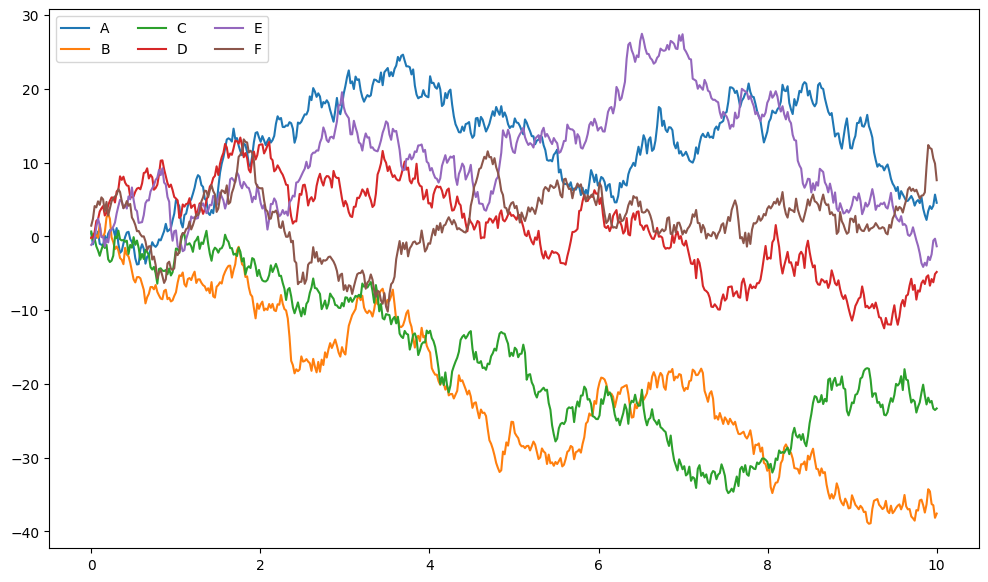

In [98]:
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=3, loc='upper left')

### Part 1: Interacting with data

##### We are going o pull cryptocurrencies piesce from a public API and downlaod them as excel files. we need to import  library first: 
### request to pull data from web 

In [73]:
import requests

In [101]:
def get_historic_price(symbol,exchange='bitfinex',after='2019-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol,exchange=exchange)
    resp = requests.get(url,params={'period':'3600','after':str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'],columns=['CloseTime','OpenPrice','HighPrice','LowPrice','ClosePrice','Volumn','NA'])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'],unit='s')
    df.set_index('CloseTime',inplace=True)
    return df

In [102]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))

In [103]:
last_week

Timestamp('2023-05-16 16:22:06.250359')

In [104]:
btc = get_historic_price('btc','bitstamp',after=last_week)

In [105]:
eth =  get_historic_price('eth','bitstamp',after=last_week)


### Bitcoin

In [79]:
btc.head()


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volumn,NA
CloseTime,,,,,,
2023-05-16 07:00:00,27074,27093,27010,27078,50.814736,1.373816e+06
2023-05-16 08:00:00,27074,27261,27074,27261,97.093872,2.639014e+06
2023-05-16 09:00:00,27259,27300,27181,27209,81.583472,2.221044e+06
2023-05-16 10:00:00,27204,27225,27085,27093,66.594178,1.808013e+06
2023-05-16 11:00:00,27095,27117,27010,27021,46.105623,1.247117e+06


<AxesSubplot:xlabel='CloseTime'>

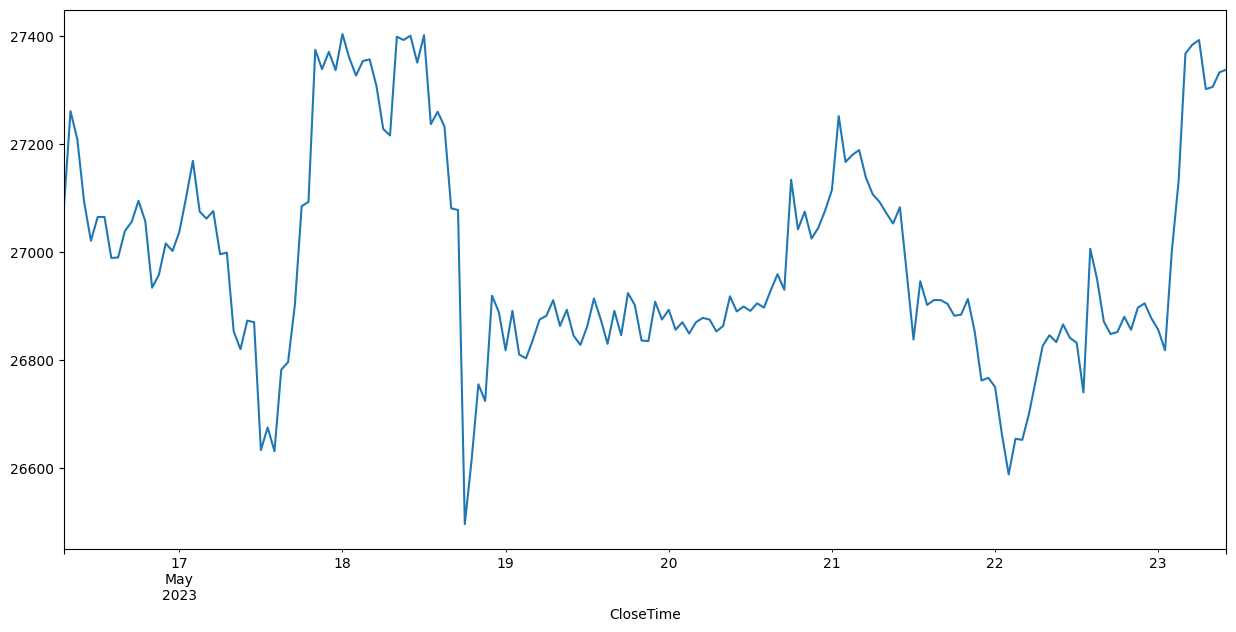

In [80]:
btc['ClosePrice'].plot(figsize=(15,7))

In [81]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volumn,NA
CloseTime,,,,,,
2023-05-15 19:00:00,1834.7,1835.6,1826.9,1830.4,198.016811,362441.439784
2023-05-15 20:00:00,1830.3,1831.7,1826.8,1828.7,92.700691,169564.825701
2023-05-15 21:00:00,1829.4,1829.9,1824.9,1826.3,68.879143,125859.645703
2023-05-15 22:00:00,1826.1,1826.8,1825.1,1825.9,55.048803,100516.734654
2023-05-15 23:00:00,1825.8,1826.4,1820.6,1823.8,267.769608,488187.094260


<AxesSubplot:xlabel='CloseTime'>

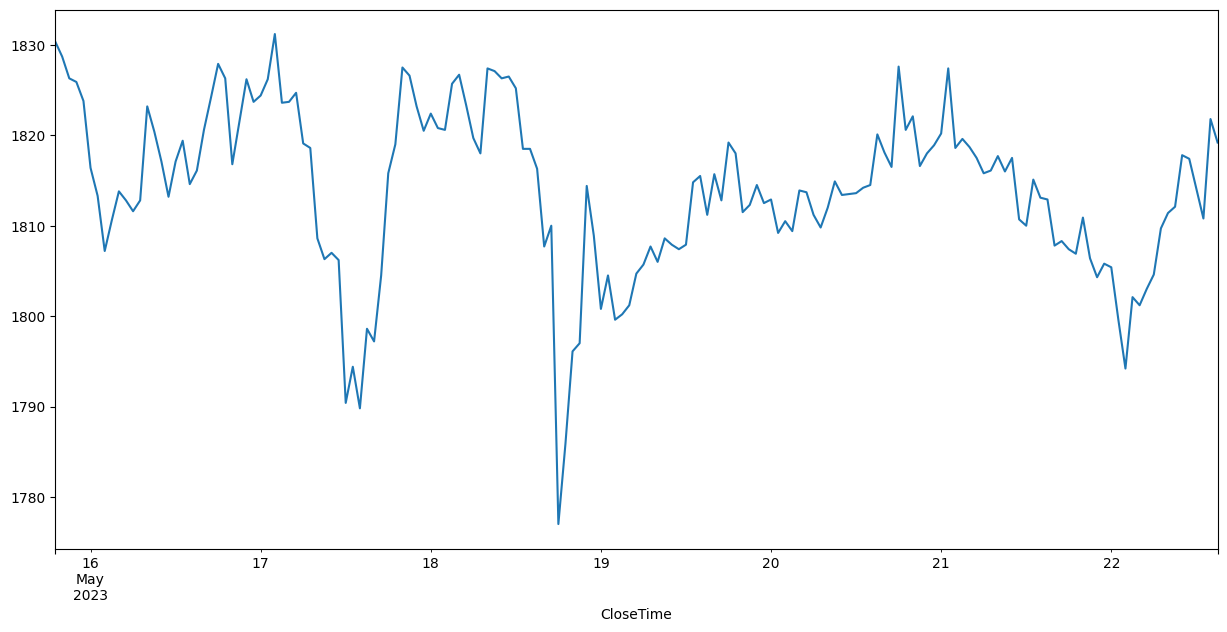

In [82]:
eth['ClosePrice'].plot(figsize=(15,7))

### Dynamic plots with Bokeh

In [ ]:
pip install bokeh

     ---------------------------------------- 8.3/8.3 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 56.5/56.5 kB 497.1 kB/s eta 0:00:00
  Using cached contourpy-1.0.7-cp310-cp310-win_amd64.whl (162 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
from bokeh.plotting import figure,output_file, show
from bokeh.io import output_notebook

In [84]:
output_notebook()

Loading BokehJS ...

In [106]:
p1 = figure(x_axis_type="datetime",title="Crypto Prices",width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label='Date'
p1.yaxis.axis_label='Time'

p1.line(btc.index,btc['ClosePrice'],color='goldenrod')
# p1.line(eth.index,btc['ClosePrice'],color='darkgreen')
show(p1)

## Exporting to Excel

##### openpyxl must be installed in your system to export data

In [89]:
pip install openpyxl  #install openpyxl

     -------------------------------------- 250.0/250.0 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
writer = pd.ExcelWriter('cryptos.xlsx') # Exporting data to a excel file with naming cryptos.xlsx

In [92]:
btc.to_excel(writer,sheet_name='Bitcoin')

In [93]:
eth.to_excel(writer,sheet_name='Etherium')

In [95]:
writer.save()